## Case study 1: Education

Download data from https://cepa.stanford.edu/seda/overview 

This was used in these [great](https://www.nytimes.com/interactive/2016/04/29/upshot/money-race-and-success-how-your-school-district-compares.html) [pieces](https://www.nytimes.com/interactive/2018/06/13/upshot/boys-girls-math-reading-tests.html?rref=collection%2Fsectioncollection%2Fupshot) from The Upshot.

In [13]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
# from statsmodels.graphics.regressionplots import abline_plot

In [2]:
# download the data 
# documentation here: https://cepa.stanford.edu/seda/download?nid=2016&destination=node/2021

# Python3
#import urllib.request
#urllib.request.urlretrieve('https://cepa.stanford.edu/sites/default/files/reardon_gender_achievement_gaps_june2018.xlsx',
#                   'data/reardon_gender_achievement_gaps_june2018.xlsx')

# Python2
import urllib
urllib.urlretrieve('https://cepa.stanford.edu/sites/default/files/reardon_gender_achievement_gaps_june2018.xlsx',
                   'data/reardon_gender_achievement_gaps_june2018.xlsx')

('data/reardon_gender_achievement_gaps_june2018.xlsx',
 <httplib.HTTPMessage instance at 0x112423ef0>)

In [2]:
# read in the data
genderGaps = pd.read_excel('data/reardon_gender_achievement_gaps_june2018.xlsx',sheet_name='Data')

In [3]:
genderGaps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 27 columns):
NCES District ID                                                                    9799 non-null int64
LEA Name                                                                            9799 non-null object
Fips State Code                                                                     9799 non-null int64
State Abbreviation                                                                  9799 non-null object
Average Number of Students in a Grade-Subject-Year                                  9799 non-null float64
Average Number of Students in a Gender-Grade-Subject-Year                           9799 non-null float64
EB Male-Female Math Achievement Gap (SD Units)                                      9799 non-null float64
EB Male-Female ELA Achievement Gap (SD Units)                                       9799 non-null float64
EB Standard Error of Male-Female Math Achievement G

In [4]:
genderGaps.head()

,NCES District ID,LEA Name,Fips State Code,State Abbreviation,Average Number of Students in a Grade-Subject-Year,Average Number of Students in a Gender-Grade-Subject-Year,EB Male-Female Math Achievement Gap (SD Units),EB Male-Female ELA Achievement Gap (SD Units),EB Standard Error of Male-Female Math Achievement Gap (SD Units),EB Standard Error of Male-Female ELA Achievement Gap (SD Units),...,Male-Female SES Composite Difference,Income at 50th percentile - All Adults,Income at 50th percentile - Female Adults,Income at 50th percentile - Male Adults,Male-Female Income V-Gap,Percent of Black Students in District,Percent of Hispanic Students in District,Percent of Other Race Students in District,Percent of White Students in District,Reliable District Gap Estimate; District has >200 Male/Female Students per Grade
0,100005,Albertville City,1,AL,324.838235,162.419118,0.021504,-0.213523,0.018799,0.021957,...,0.502593,40624.875000,16791.078125,22030.841797,0.335727,0.020509,0.359691,0.006651,0.613149,0
1,100006,Marshall County,1,AL,429.956522,214.978261,-0.013887,-0.277141,0.018445,0.021587,...,1.157112,46291.406250,18800.984375,29471.154297,0.535644,0.010323,0.152557,0.005147,0.831973,1
2,100007,Hoover City,1,AL,1028.800000,514.400000,0.091745,-0.198714,0.017199,0.020133,...,1.752485,91102.960938,30829.210938,49896.000000,0.541240,0.237562,0.058036,0.067920,0.636483,1
3,100008,Madison City,1,AL,691.000000,345.500000,0.068193,-0.244838,0.018798,0.022085,...,3.458734,103228.351562,30709.275391,70075.921875,0.750754,0.203375,0.034092,0.092675,0.669858,1
4,100011,Leeds City,1,AL,126.250000,63.125000,0.034096,-0.232109,0.023561,0.027794,...,1.519979,52999.699219,19138.232422,33433.589844,0.534928,0.244041,0.120533,0.011300,0.624126,0


In [5]:
# make column names shorter for the ones we'll use
genderGaps.rename(columns={
    'EB Male-Female Math Achievement Gap (Grade Equivalent Units)': 'gap_math',
    'EB Male-Female ELA Achievement Gap (Grade Equivalent Units)': 'gap_ela',
    'SES Composite - All Adults': 'ses',
    'Average Number of Students in a Grade-Subject-Year': 'students'
}, inplace=True)

AttributeError: 'module' object has no attribute 'show'

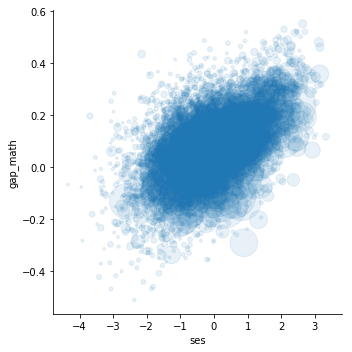

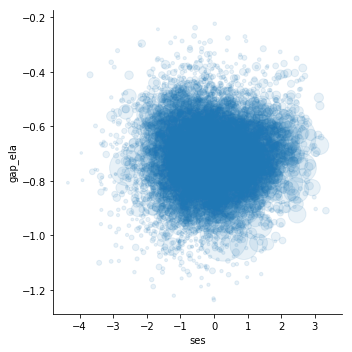

In [11]:
# plot roughly what's in the Upshot graphic
import seaborn as sns
size = genderGaps.students / 6
sns.lmplot(x='ses', y='gap_math', data=genderGaps, fit_reg=False, scatter_kws={'alpha':0.1, 's':size})
sns.lmplot(x='ses', y='gap_ela', data=genderGaps, fit_reg=False, scatter_kws={'alpha':0.1, 's':size})


In [14]:
# model
m = smf.ols(formula='gap_math ~ ses', data=genderGaps).fit()

In [15]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               gap_math   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3048.
Date:                Wed, 27 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:03:21   Log-Likelihood:                 7736.4
No. Observations:                9799   AIC:                        -1.547e+04
Df Residuals:                    9797   BIC:                        -1.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0943      0.001     83.741      0.0